In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [3]:
PATH = os.path.join('./', 'cars')


In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_busy_dir = os.path.join(train_dir, 'busy')  # directory with our training cat pictures
train_free_dir = os.path.join(train_dir, 'free')  # directory with our training dog pictures
validation_busy_dir = os.path.join(validation_dir, 'busy')  # directory with our validation cat pictures
validation_free_dir = os.path.join(validation_dir, 'free')  # directory with our validation dog pictures

In [6]:
num_free_tr = len(os.listdir(train_free_dir))
num_busy_tr = len(os.listdir(train_busy_dir))

num_free_val = len(os.listdir(validation_free_dir))
num_busy_val = len(os.listdir(validation_busy_dir))

total_train = num_free_tr + num_busy_tr
total_val = num_free_val + num_busy_val

In [7]:
print('total training cat images:', num_free_tr)
print('total training dog images:', num_busy_tr)

print('total validation cat images:', num_free_val)
print('total validation dog images:', num_busy_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 2550
total training dog images: 3621
total validation cat images: 1632
total validation dog images: 4781
--
Total training images: 6171
Total validation images: 6413


In [8]:
batch_size = 128
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 6171 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 6413 images belonging to 2 classes.


In [12]:
from PIL import Image
print(Image.__file__)

/home/tunarug/anaconda3/envs/ai36/lib/python3.6/site-packages/PIL/Image.py


In [13]:
sample_training_images, _ = next(train_data_gen)

In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

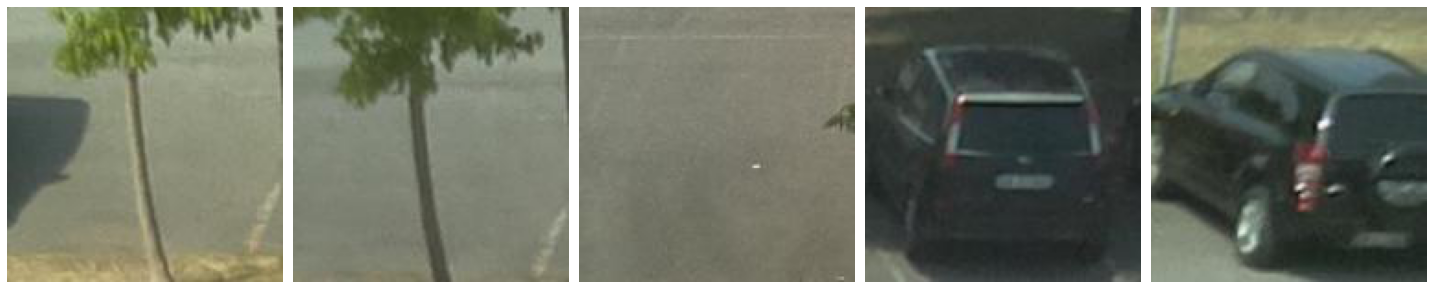

In [15]:
plotImages(sample_training_images[:5])

In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [19]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [21]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[cp_callback]
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 48 steps, validate for 50 steps
Epoch 1/5
47/48 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8159
Epoch 00001: saving model to training_1/cp.ckpt
48/48 [==============================] - 51s 1s/step - loss: 0.3436 - accuracy: 0.8190 - val_loss: 0.5279 - val_accuracy: 0.7839
Epoch 2/5
47/48 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9861
Epoch 00002: saving model to training_1/cp.ckpt
48/48 [==============================] - 49s 1s/step - loss: 0.0354 - accuracy: 0.9864 - val_loss: 1.1117 - val_accuracy: 0.6573
Epoch 3/5
47/48 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9915
Epoch 00003: saving model to training_1/cp.ckpt
48/48 [==============================] - 48s 1s/step - loss: 0.0207 - accuracy: 0.9917 - val_loss: 0.6178 - val_accuracy: 0.7705
Epoch 4/5
47/48 [=====

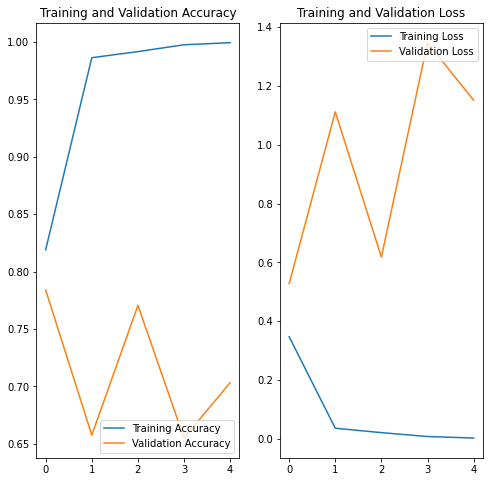

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
ls {checkpoint_dir}


checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [26]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_1/cp.ckpt'

In [28]:
model.save('my_model.h5') 